# Classify irises

From the example: https://github.com/fastforwardlabs/keras-hello-world/blob/master/kerashelloworld.ipynb

## Load libraries & prepare data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

/usr/local/lib/python3.5/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using TensorFlow backend.


Display Iris data in Seaborn

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Plot the data

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


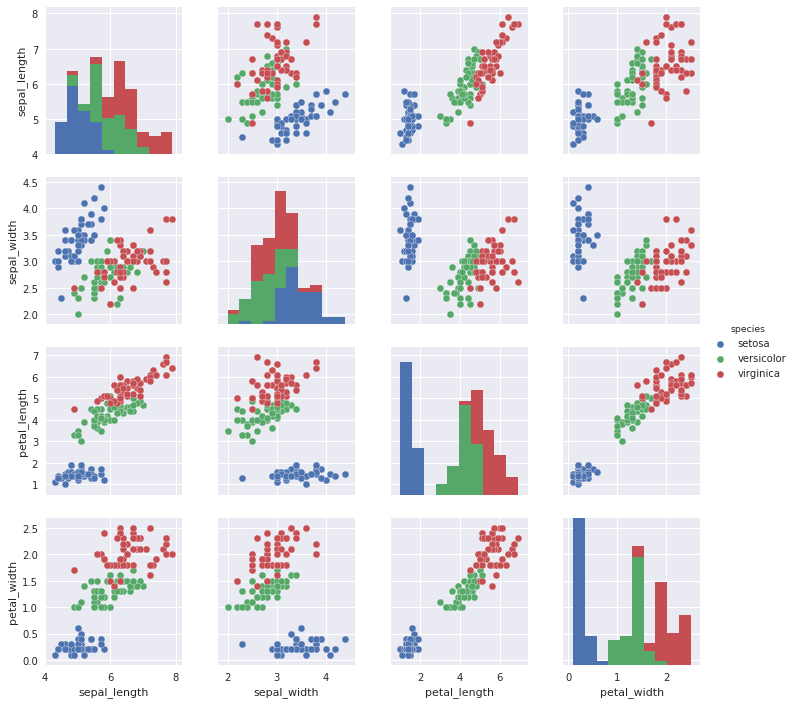

In [3]:
sns.pairplot(iris, hue='species')

Extract the raw data

In [4]:
X = iris.values[:, :4]
y = iris.values[:, 4]

Split the data into the training and test set

In [5]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, train_size=0.5, random_state=0)

## Train & evaluate logistic regression classifier

In [6]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Assess the classifier using accuracy

In [7]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83


## Train and evaluate the neural network

In [8]:
def one_hot_encode_object_array(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

Build the neural network

In [21]:
model = Sequential()
# 4 measurements for each iris
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
# 3 species of irises
model.add(Dense(3))
model.add(Activation('softmax'))

Compile model

In [22]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=[
        'accuracy'])

Fit the model

In [23]:
model.fit(train_X, train_y_ohe, nb_epoch=100, batch_size=1, verbose=0)

In [24]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print('accuracy = {:.2f}'.format(accuracy))

accuracy = 0.97
